### Step 1: Import data and initial observations

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [6]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Step 2: Bag-of-words feature representation for descriptive text

I included both unigram and bigram for my bag-of-words feature extraction.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 63220)

### Step 3: Fit Kmeans model

Since it takes very long to fit the K-mean models, I wasn't able to do a lot of iterations.

In [8]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

#### First plot inertia scores by number of clusters

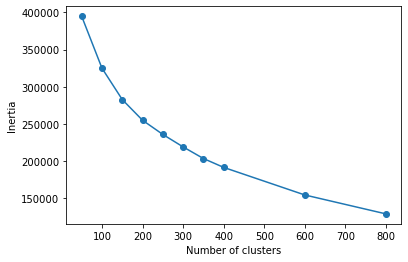

In [17]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []
ranges = [50,100,150,200,250,300,350,400,600,800]

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in ranges:
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(ranges, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Second plot inertia scores based on first plot

Unfortunately it took me too long to render the inertia plots, and it limits my ability to do continuous testing. I will keep this block here for further iteration. 

In [ ]:
# second attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions2 = []
ranges2 = [200,225,250,275,300,325,350,375,400]
# fit KMeans iteratively to begin to assess the appropriate number of clusters
for j in ranges2:
    km2 = KMeans(n_clusters=j, init='k-means++')
    km2.fit(X)
    distortions2.append(km2.inertia_)
    
# vizualize change in inertia
plt.plot(ranges2, distortions2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Step 3: Silhouette Analysis

For some reason, I ran into issues generating silhouette analysis using the starter code for option 2. It might have something to do with my array structure. Instead, I downloaded a visualization library `yellowbrick` to generate the silhouettes. I still ran into troubles.

In [ ]:
#pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [290,300,310,320]:

    #Create KMeans instance for different number of clusters
    km3 = KMeans(n_clusters=i, init='k-means++', n_init=290, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
   
    visualizer = SilhouetteVisualizer(km3, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

### Step 4: Review clustering result

### labels are named with integers and stored in the `labels_` attribute


In [10]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km_final = KMeans(n_clusters=300,n_init=200)
km_final.fit(X)

KMeans(n_clusters=300, n_init=200)

In [11]:
km_final.labels_
#sort labels
km_final.labels_.sort()

In [14]:
#create sampling labels
sample_labels = [0,5,10,50,100,150,200,250,300]

In [16]:
for i in range(0,len(km_final.labels_)):
    for label in sample_labels:
        if km_final.labels_[i] ==label:
            print(f"Cluster-{km_final.labels_[i]}")
            print(raw_data['product_description'][i])
            print('**********')

Cluster-0
Native Catch Salmon Bacon, Traditional flavor.  UPC 7 83583 27965 9.     Traditional Salmon Bacon is ground and seasoned skinless/boneless salmon, extruded, peppered, smoked, cooled and vacuum packed in 8 oz., 14 oz., and 5 lbs. clear vacuum bags.  Label states keep refrigerated or frozen".    
**********
Cluster-5
Onions Julienne Sliced.  Products are labeled in part:  "***Onions Yellow Julienne Sliced***Ready To Eat Product***4/5 LB***"         "***FP CENTRAL FL. FRESHCUTS ONIONS, FC YELLOW JUL SLICED 1/4"***4/5 #***RT # FC***"    Item #  514098 ONIONS, FC YELLOW JUL SLICED 1/4"  4/5 #.                      
**********
Cluster-10
Garden Highway Chef Essentials Pizza Style Portabella Mushrooms: 8.0 oz  .  Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Cluster-50
Red Grapes 80/1.5 oz (3,402g) bag Item #71305 BEST USED BY: 11/21/12
**********
Cluster-50
Ground limestone also known as calcium carbonate. Omya's food grade ground limestone products. All bulk wi

### Step 5: Conclusion
 
My final solution is to cluster at a more granular level - "packaged lettuced", "peanut butter", "cherry icecream" etc. By examing the elbow and sampling the clustered item descriptions, I think I can use 300 as a start. Some clusters get a bit mixed up when Formula labels have an oversized influence. I may consider adding Formula to the stop words.